#Image classification of Cifar 10 dataset using Resnet 18 CNN model

### Initialize the parameters

In [ ]:
EPOCHS = 15
BATCH_SIZE = 32
TRAIN_DATASET_SIZE = 50000
BUCKET_SIZE = 5
NUMBER_OF_BATCHES =  TRAIN_DATASET_SIZE // BATCH_SIZE
NUMBER_OF_BUCKETS = NUMBER_OF_BATCHES // BUCKET_SIZE

## Import the model library from https://github.com/tfdeepnet/visionlib.git

In [ ]:
!git clone https://github.com/tfdeepnet/visionlib.git

Cloning into 'visionlib'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 45 (delta 14), reused 38 (delta 7), pack-reused 0
Unpacking objects: 100% (45/45), done.


In [ ]:
!pip install -e /content/visionlib


Obtaining file:///content/visionlib
  Running setup.py develop for visionlib


In [ ]:
import visionlib.models as vl
import visionlib.utils as utl

In [ ]:
%matplotlib inline

## Import the libraries

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.optim.lr_scheduler import StepLR
import torch.nn as nn
import torch.nn.functional as F


## Use the loaddata utility from visionlib library to load train and test data





In [ ]:
trainloader, testloader = utl.loaddata(BATCH_SIZE , datasetname = "Cifar10")

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Let us show some of the training images, for fun.



img shape  torch.Size([32, 3, 32, 32])
  car truck  deer  bird


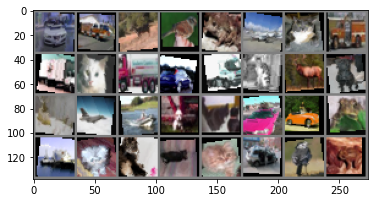

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
print("img shape " , images.shape)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Instantiate a resnet18 model to train and test the cifar 10 dataset


In [ ]:
net = vl.ResNet18()

### Get the model summary alongwith the recepive field at each layer

In [ ]:
#!pip install torchsummary
#from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

utl.summary(net.to(device), input_size=(3, 32, 32))

cuda
-----------------------------------------------------------------------------------------------
        Layer (type) |              Output Shape |         Param # |          RF out |         Jump in
            Conv2d-1 |          [-1, 64, 32, 32] |           1,728 |               3 |               1
       BatchNorm2d-2 |          [-1, 64, 32, 32] |             128 |               0 |               0
            Conv2d-3 |          [-1, 64, 32, 32] |          36,864 |               5 |               1
       BatchNorm2d-4 |          [-1, 64, 32, 32] |             128 |               0 |               0
            Conv2d-5 |          [-1, 64, 32, 32] |          36,864 |               7 |               1
       BatchNorm2d-6 |          [-1, 64, 32, 32] |             128 |               0 |               0
        BasicBlock-7 |          [-1, 64, 32, 32] |               0 |               0 |               0
            Conv2d-8 |          [-1, 64, 32, 32] |          36,864 |       

(tensor(11173962), tensor(11173962))

## Define a Loss function, optimizer and scheduler 

Let's use a Classification Cross-Entropy loss , SGD with momentum and StepLR to vary the learning rate progrssively.



In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

## Train the network for 15 epochs



In [ ]:
for epoch in range(EPOCHS):  # loop over the dataset multiple times
    utl.train(epoch , trainloader, optimizer, net, criterion, NUMBER_OF_BUCKETS , device )
    scheduler.step()            

print('Finished Training')

[1,     1] loss: 0.008
[1,   313] loss: 2.004
[1,   625] loss: 1.642
[1,   937] loss: 1.518
[1,  1249] loss: 1.397
[1,  1561] loss: 1.287
[2,     1] loss: 0.003
[2,   313] loss: 1.204
[2,   625] loss: 1.146
[2,   937] loss: 1.067
[2,  1249] loss: 0.996
[2,  1561] loss: 0.968
[3,     1] loss: 0.002
[3,   313] loss: 0.899
[3,   625] loss: 0.868
[3,   937] loss: 0.847
[3,  1249] loss: 0.814
[3,  1561] loss: 0.795
[4,     1] loss: 0.002
[4,   313] loss: 0.753
[4,   625] loss: 0.710
[4,   937] loss: 0.717
[4,  1249] loss: 0.699
[4,  1561] loss: 0.695
[5,     1] loss: 0.003
[5,   313] loss: 0.647
[5,   625] loss: 0.656
[5,   937] loss: 0.632
[5,  1249] loss: 0.617
[5,  1561] loss: 0.621
[6,     1] loss: 0.001
[6,   313] loss: 0.575
[6,   625] loss: 0.570
[6,   937] loss: 0.556
[6,  1249] loss: 0.581
[6,  1561] loss: 0.558
[7,     1] loss: 0.002
[7,   313] loss: 0.460
[7,   625] loss: 0.419
[7,   937] loss: 0.412
[7,  1249] loss: 0.400
[7,  1561] loss: 0.406
[8,     1] loss: 0.001
[8,   313] 

### Let us display a batch of image from the test set to get familiar.



GroundTruth:    cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship   dog horse  ship  frog horse plane  deer truck   dog  bird  deer plane truck  frog  frog   dog


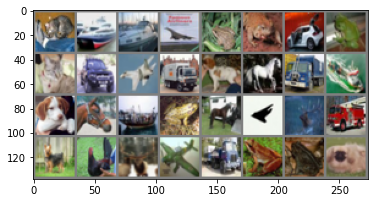

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(BATCH_SIZE)))

Okay, now let us see what the neural network thinks these examples above are:



In [ ]:
outputs = net(images.to(device))

The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(BATCH_SIZE)))

Predicted:    cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship   dog horse  ship  frog horse  bird  deer truck  deer  bird  deer plane truck  frog  frog   dog


The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [ ]:
utl.test(testloader, net, device )

Accuracy of the network on the 10000 test images: 86 %


## Test accuracy 86% (randomly picking a class out of 10 classes).
Seems like the network learnt something.




## Test accuracy at each class level

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 89 %
Accuracy of   car : 95 %
Accuracy of  bird : 80 %
Accuracy of   cat : 70 %
Accuracy of  deer : 84 %
Accuracy of   dog : 80 %
Accuracy of  frog : 85 %
Accuracy of horse : 91 %
Accuracy of  ship : 93 %
Accuracy of truck : 96 %
